In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import re


from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [7]:
data = pd.read_csv('/content/amazon.csv')

In [8]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
data.info()    # information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [10]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')
data['discounted_price'] = data['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         326 non-null    float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [12]:
data.describe()

,discounted_price,actual_price,rating,rating_count
count,1465.000000,1465.000000,1464.000000,326.000000
mean,3125.310874,5444.990635,4.096585,348.217791
std,6944.304394,10874.826864,0.291674,268.041590
min,39.000000,39.000000,2.000000,2.000000
25%,325.000000,800.000000,4.000000,119.000000
50%,799.000000,1650.000000,4.100000,293.000000
75%,1999.000000,4295.000000,4.300000,544.000000
max,77990.000000,139900.000000,5.000000,992.000000


In [13]:
data.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,1
rating_count,1139
about_product,0
user_id,0


In [14]:
data['rating_count'].fillna(0,inplace=True)
data['rating'].fillna(0,inplace=True)

In [15]:
data.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


                  discounted_price  actual_price    rating  rating_count
discounted_price          1.000000      0.961915  0.114298     -0.078915
actual_price              0.961915      1.000000  0.116629     -0.067518
rating                    0.114298      0.116629  1.000000     -0.138556
rating_count             -0.078915     -0.067518 -0.138556      1.000000


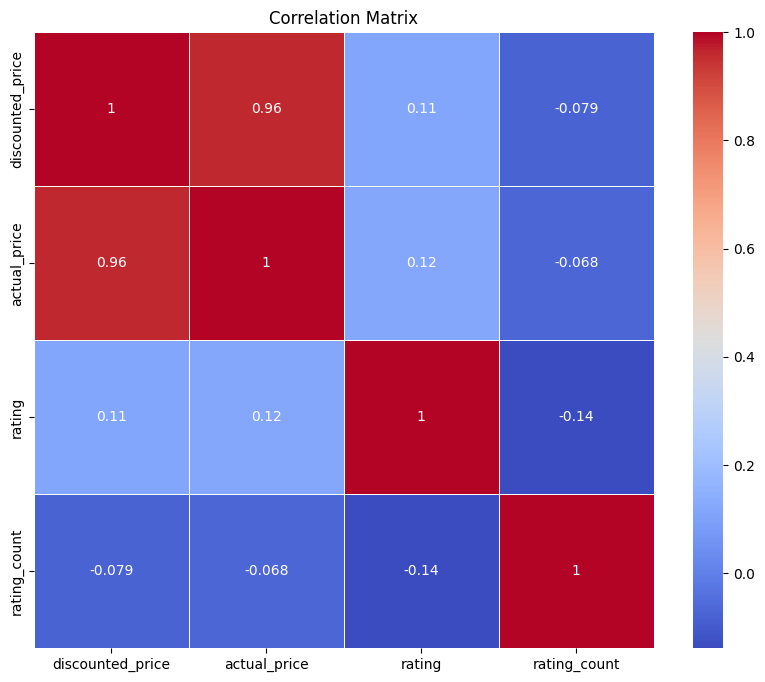

In [16]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
print(correlation_matrix)
plt.show()

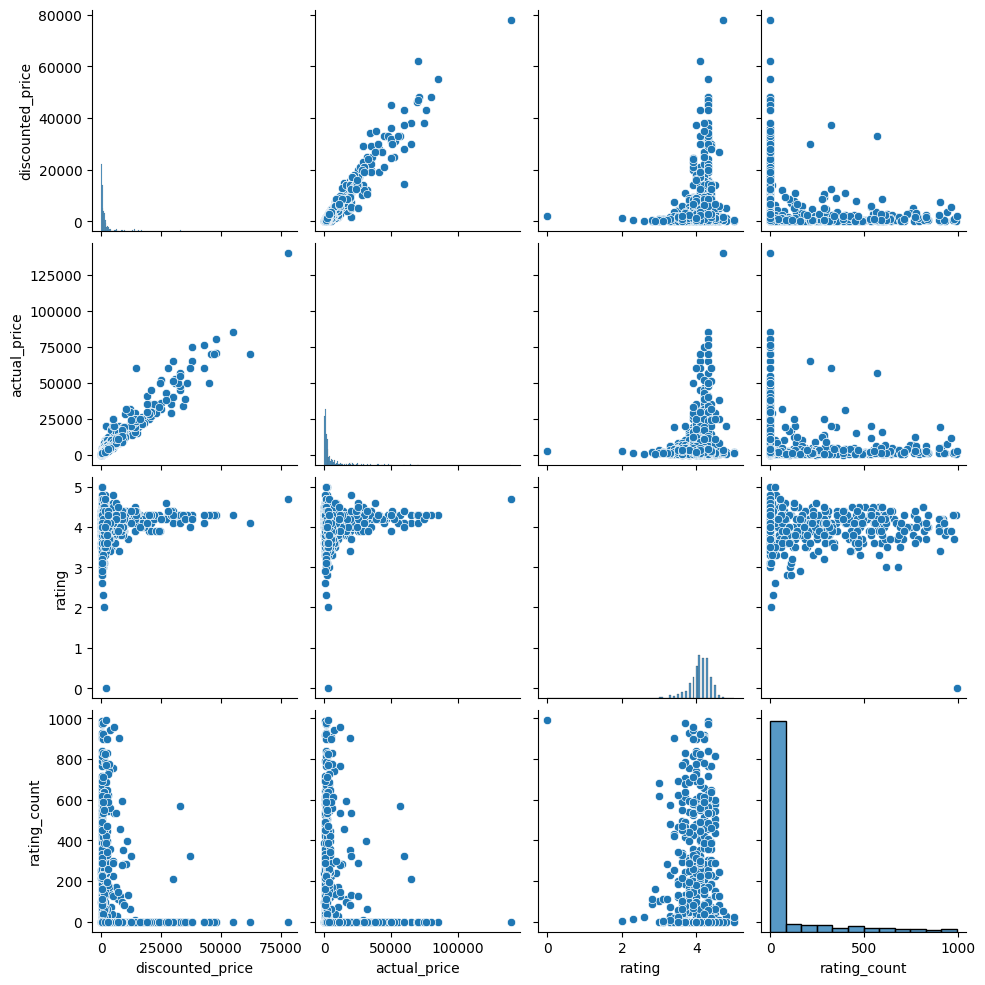

In [17]:
sns.pairplot(data)

In [18]:
numeric_data

,discounted_price,actual_price,rating,rating_count
0,399.0,1099.0,4.2,0.0
1,199.0,349.0,4.0,0.0
2,199.0,1899.0,3.9,0.0
3,329.0,699.0,4.2,0.0
4,154.0,399.0,4.2,0.0
...,...,...,...,...
1460,379.0,919.0,4.0,0.0
1461,2280.0,3045.0,4.1,0.0
1462,2219.0,3080.0,3.6,468.0
1463,1399.0,1890.0,4.0,0.0


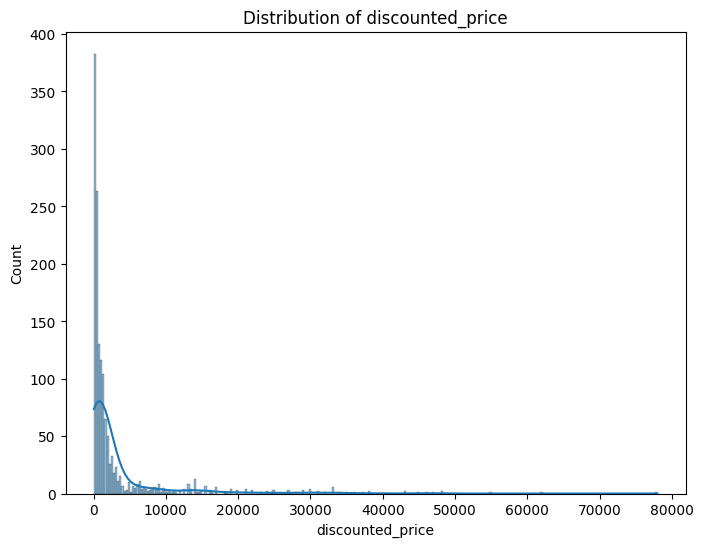

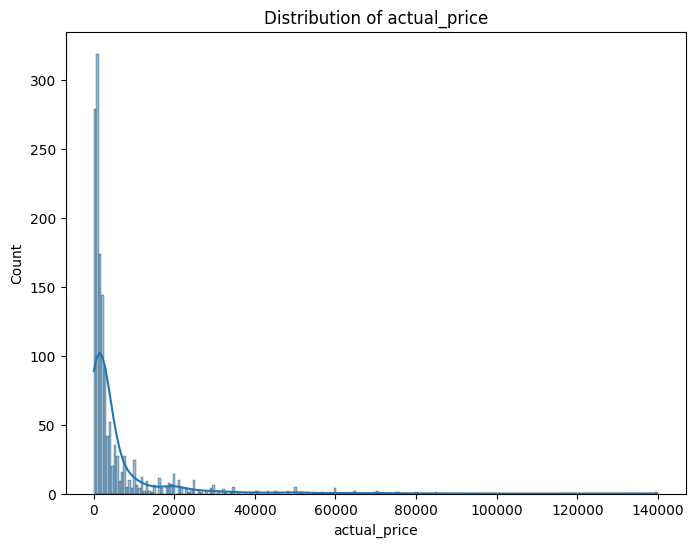

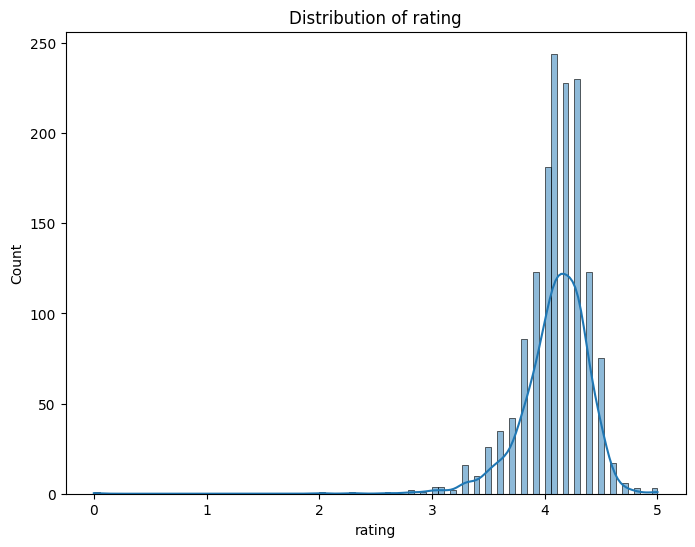

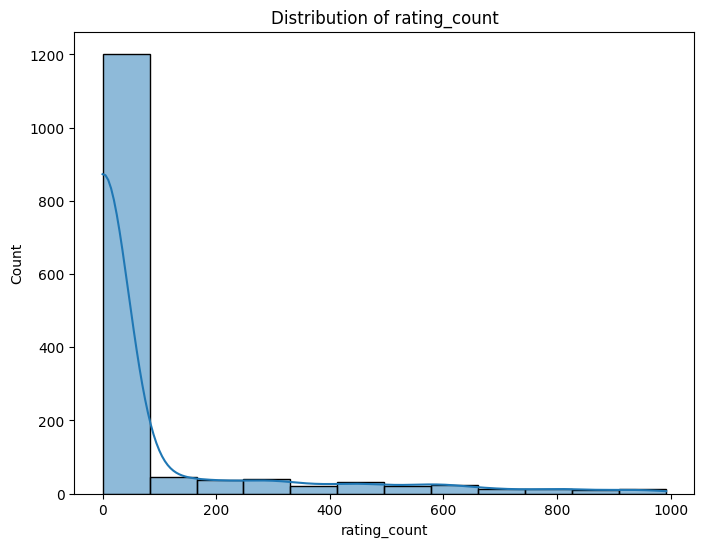

In [19]:
for col in numeric_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [20]:
data.groupby('rating')['rating_count'].mean().sort_values(ascending=False).head(5)

,rating_count
rating,
0.0,992.000000
3.0,350.250000
3.4,202.200000
3.2,199.000000
3.7,186.047619


Text(0.5, 1.0, 'Distribution of Ratings')

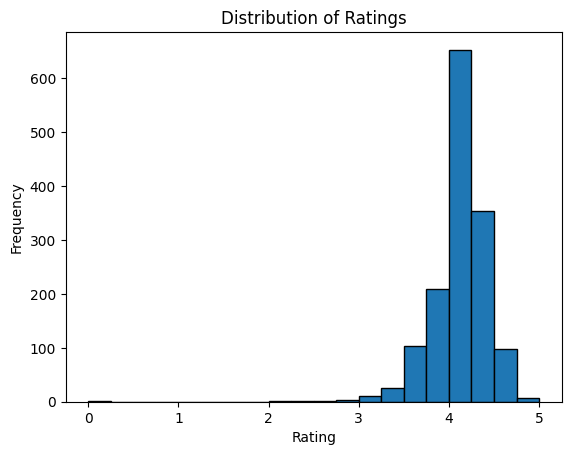

In [21]:
plt.hist(data['rating'], bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

In [22]:
newdata = data.sort_values(by='rating', ascending=False)
newdata= newdata.head(10)

<Axes: title={'center': 'Top 10 Products by Rating'}, xlabel='product_id'>

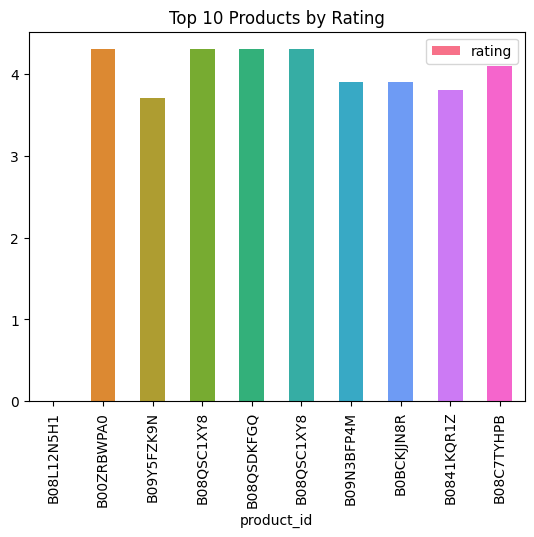

In [23]:
data2 = data.sort_values(by='rating_count', ascending=False)
data2 = data2.head(10)
# Plot with unique colors for each product_id
colors = sns.color_palette('husl', len(data2))
data2.plot(kind='bar', x='product_id', y='rating', title='Top 10 Products by Rating',color=colors)

<Axes: title={'center': 'Top 10 user_id by Rating'}, xlabel='user_id'>

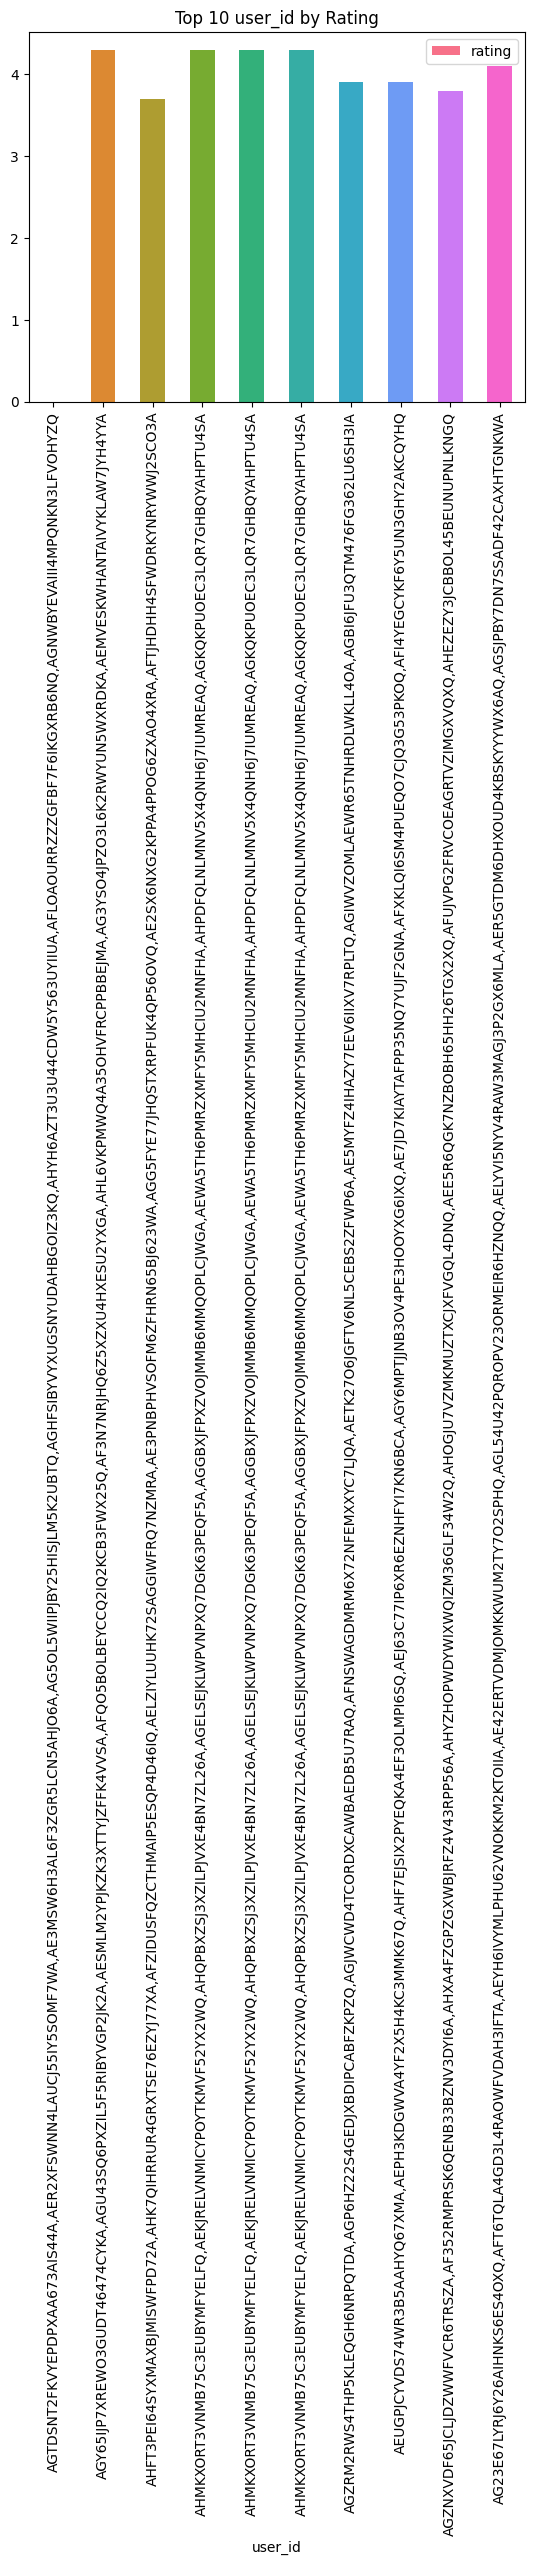

In [24]:
colur = sns.color_palette('husl', len(data2))
data2.plot(kind='bar', x='user_id', y='rating', title='Top 10 user_id by Rating',color=colur)

In [25]:
data.duplicated().sum()

0

In [26]:
# text cleaning
data['review_content']

,review_content
0,Looks durable Charging is fine tooNo complains...
1,I ordered this cable to connect my phone to An...
2,"Not quite durable and sturdy,https://m.media-a..."
3,"Good product,long wire,Charges good,Nice,I bou..."
4,"Bought this instead of original apple, does th..."
...,...
1460,"I received product without spanner,Excellent p..."
1461,"ok,got everything as mentioned but the measuri..."
1462,"plastic but cool body ,u have to find sturdy s..."
1463,I have installed this in my kitchen working fi...


Content-based filtering

In [27]:

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove one-word and two-word phrases
    text = re.sub(r'\b\w{1,2}\b', '', text)

    # Remove stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split()])

    return text


In [28]:
data['review_content'] = data['review_content'].apply(clean_text)

In [29]:
data['review_content']

,review_content
0,"look durable charge fine toono complains,charg..."
1,order cable connect phone android auto car. ca...
2,"quite durable sturdy, good, nice product,worki..."
3,"good product,long wire,charges good,nice, boug..."
4,"bought instead original apple, do work 150rs, ..."
...,...
1460,"receive product spanner,excellent product,' li..."
1461,",got mention measure cup broken didn' expect a..."
1462,"plastic cool body , sturdy surface vertically ..."
1463,instal kitchen work fine just fan speed slow f...


In [30]:
data2 = data['rating']

In [31]:
tfidfver = TfidfVectorizer()
tfidf_matrix = tfidfver.fit_transform(data['review_content']) # assign the matrix to a different variable


In [32]:
liner = linear_kernel(tfidf_matrix, tfidf_matrix)

In [33]:
from operator import index
index = pd.Series(data.index, index=data['product_name']).drop_duplicates()
index

,0
product_name,
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",0
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",1
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",2
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",3
"Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)",4
...,...
"Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | for All Types of RO Water purifiers (5 Piece, White, 10 Inch, 5 Micron) - RO Spun Filter Cartridge Sponge Replacement Water Filter Candle",1460
"Prestige Delight PRWO Electric Rice Cooker (1 L, White)",1461
"Bajaj Majesty RX10 2000 Watts Heat Convector Room Heater (White, ISI Approved)",1462


In [34]:
index['Prestige Delight PRWO Electric Rice Cooker (1 L, White)']

1461

In [35]:
def get_recommendations(name, liner=liner, top_n=5):
    idx = index[name]
    liner_scores = list(enumerate(liner[idx]))
    # Check if x[1] is a scalar before indexing
    liner_scores = sorted(liner_scores, key=lambda x: x[1] if np.isscalar(x[1]) else x[1][0], reverse=True)
    liner_scores = liner_scores[1:top_n+1]
    product_indices = [i[0] for i in liner_scores]
    return data['product_name'].iloc[product_indices]

get_recommendations(input("Enter product name:"), top_n=5)

Enter product name:Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)


,product_name
1124,Luminous Vento Deluxe 150 mm Exhaust Fan for K...
273,VW 80 cm (32 inches) HD Ready Android Smart LE...
1442,Havells Ambrose 1200mm Ceiling Fan (Pearl Whit...
323,TCL 108 cm (43 inches) 4K Ultra HD Certified A...
182,"boAt LTG 500 Apple MFI Certified for iPhone, i..."


# Item-based Collaborative Filtering:

In [36]:
# Create the pivot table with error handling
pivot_table = pd.pivot_table(
    data,
    values='rating',
    index='product_id',
    columns='user_id',
    aggfunc='mean',  # Or another suitable aggregation function

)

print(pivot_table.head())

user_id     AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA  \
product_id                                                                                                                                                                                  
B002PD61Y4                                                NaN                                                                                                                               
B002SZEOLG                                                NaN                                                                                                                               
B003B00484                                                NaN                                                                                                                               
B003L62T7W                                             

In [37]:
pivot_table = pivot_table.fillna(0)
user_sim = cosine_similarity(pivot_table)

In [38]:
user_sim = pd.DataFrame(user_sim, index=pivot_table.index, columns=pivot_table.index)

In [39]:
user_sim.head()

product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ,B005FYNT3G,B005LJQMCK,B005LJQMZC,B006LW0WDQ,B0073QGKAS,...,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BQRJ3C47,B0BR4F878Q
product_id,,,,,,,,,,,,,,,,,,,,,
B002PD61Y4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B002SZEOLG,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B003B00484,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B003L62T7W,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B004IO5BMQ,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
def get_similar_products_by_name(product_name, data, user_sim, top_n=5):
    """
    Gets similar products based on product name.

    Args:
        product_name (str): The name of the product.
        data (pd.DataFrame): The original DataFrame containing product information.
        user_sim (pd.DataFrame): The user similarity matrix.
        top_n (int, optional): The number of similar products to return. Defaults to 5.

    Returns:
        pd.DataFrame: A DataFrame containing the top N similar products.
    """

    # Check if the product name exists in the data
    if product_name not in data['product_name'].values:
        print(f"Product '{product_name}' not found in the data.")
        return pd.DataFrame(columns=['product_id', 'product_name'])

    # Get the product ID for the given product name
    product_id = data[data['product_name'] == product_name]['product_id'].iloc[0]

    # Get the similarity scores for the given product ID
    similar_scores = user_sim[product_id].sort_values(ascending=False)

    # Get the top N similar product IDs
    top_similar_ids = similar_scores.index[1:top_n + 1]

    # Get the product names for the top similar product IDs
    similar_products = data[data['product_id'].isin(top_similar_ids)][
        [ 'product_name']
    ]

    return similar_products


# Example usage:
product_name = input("Enter product name: ")
similar_products = get_similar_products_by_name(product_name, data, user_sim)
print(similar_products)


Enter product name: Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)
                                           product_name
46    D-Link DWA-131 300 Mbps Wireless Nano USB Adap...
238   Hi-Mobiler iPhone Charger Lightning Cable,2 Pa...
687   HP 150 Wireless USB Mouse with Ergonomic and a...
881   D-Link DWA-131 300 Mbps Wireless Nano USB Adap...
940   HP 330 Wireless Black Keyboard and Mouse Set w...
1395  Empty Mist Trigger Plastic Spray Bottle for Mu...


In [41]:
def hybrid_recommendation(product_name, data, user_sim, liner, top_n=5):
    """
    Provides hybrid recommendations by combining content-based and collaborative filtering.

    Args:
        product_name (str): The name of the product.
        data (pd.DataFrame): The original DataFrame containing product information.
        user_sim (pd.DataFrame): The user similarity matrix.
        liner (np.ndarray): The similarity matrix from content-based filtering.
        top_n (int, optional): The number of similar products to return. Defaults to 5.

    Returns:
        pd.DataFrame: A DataFrame containing the top N hybrid recommendations.
    """
    # Get content-based recommendations
    contain_recomadation = get_recommendations(product_name, liner=liner, top_n=top_n)

    # Get collaborative filtering recommendations
    collab_recomadation = get_similar_products_by_name(product_name, data, user_sim, top_n=top_n)

    # Combine and deduplicate recommendations
    hybrid_recommendation = pd.concat([contain_recomadation, collab_recomadation])
    hybrid_recommendation = hybrid_recommendation.drop_duplicates()

    # Return the recommended product names
    return hybrid_recommendation


product_name = input("Enter product name: ")
# Pass 'liner' to hybrid_recommendation
hybrid_recommendations = hybrid_recommendation(product_name, data, user_sim, liner)
print(hybrid_recommendations)

Enter product name: Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)
                                           product_name
1124  Luminous Vento Deluxe 150 mm Exhaust Fan for K...
273   VW 80 cm (32 inches) HD Ready Android Smart LE...
1442  Havells Ambrose 1200mm Ceiling Fan (Pearl Whit...
323   TCL 108 cm (43 inches) 4K Ultra HD Certified A...
182   boAt LTG 500 Apple MFI Certified for iPhone, i...
46    D-Link DWA-131 300 Mbps Wireless Nano USB Adap...
238   Hi-Mobiler iPhone Charger Lightning Cable,2 Pa...
687   HP 150 Wireless USB Mouse with Ergonomic and a...
940   HP 330 Wireless Black Keyboard and Mouse Set w...
1395  Empty Mist Trigger Plastic Spray Bottle for Mu...


Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black)

In [42]:
import pickle

In [43]:
with open('liner.pkl', 'wb') as file:
    pickle.dump(liner, file)

In [44]:
with open('user_sim.pkl', 'wb') as file:
    pickle.dump(user_sim, file)

In [45]:
with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)

In [46]:
with open('tfidf_matrix.pkl', 'wb') as file:
    pickle.dump(tfidf_matrix, file)


In [47]:
with open('get_wordnet_pos(word).pkl', 'wb') as file:
    pickle.dump(get_wordnet_pos, file)
with open('clean_text(text).pkl' ,'wb') as file:
    pickle.dump(clean_text, file)

In [48]:
with open('get_recommendations(name, liner=liner, top_n=5).pkl', 'wb') as file:
    pickle.dump(get_recommendations, file)

In [49]:
with open('get_similar_products_by_name(product_name, data, user_sim, top_n=5).pkl', 'wb') as file:
    pickle.dump(get_similar_products_by_name, file)


In [50]:
with open('hybrid_recommendation(product_name, data, user_sim, liner, top_n=5).pkl', 'wb') as file:
    pickle.dump(hybrid_recommendation, file)